# Phân loại và k-nearest neighbours

Phân loại là một phương pháp học có giám sát có thể được coi là một cách để **chia hoặc phân loại một số phần tử chưa biết thành một tập hợp các lớp riêng biệt.** Phân loại cố gắng **tìm hiểu mối quan hệ giữa một tập hợp các biến thuộc tính** và một biến mục tiêu quan tâm. 

**Thuộc tính mục tiêu (target attribute)** trong phân loại là một **biến kiểu phân loại với các giá trị rời rạc.** Với một tập hợp các điểm dữ liệu huấn luyện cùng với các nhãn mục tiêu, phân loại xác định nhãn lớp cho trường hợp kiểm tra không dán nhãn.

Phân loại dữ liệu có **một số ứng dụng trong nhiều ngành công nghiệp.** Nhiều vấn đề có thể được thể hiện dưới dạng liên kết giữa các biến thuộc tính và biến mục tiêu, đặc biệt là khi dữ liệu được dán nhãn có sẵn. Điều này cung cấp một phạm vi rộng của khả năng ứng dụng để phân loại. Ví dụ, được sử dụng để lọc email, nhận dạng giọng nói, nhận dạng chữ viết tay, nhận dạng sinh trắc học, phân loại tài liệu và nhiều hơn nữa.

Ở đây chúng ta có các loại thuật toán phân loại trong học máy như:

- Cây quyết định
- Naive Bayes
- Phân tích phân biệt tuyến tính
- k-Nearest Neighbors
- Hồi quy logistic
- Neural networks
- Support vector machines

Thuật toán k-Nearest Neighbors là một thuật toán lấy một loạt các điểm được gắn nhãn và sử dụng chúng để tìm hiểu cách gắn nhãn các điểm khác. Phân loại các trường hợp **dựa trên sự giống nhau của chúng với các trường hợp khác.** Trong KNN, **các điểm dữ liệu gần nhau được gọi là neighbors.** Để kiểm tra sự giống nhau hoặc khác biệt của 2 trường hợp, thuật toán tính khoảng cách của 2 trường hợp. Ví dụ như bằng công thức khoảng cách Euclide.

Thuật toán k-Nearest Neighbors hoạt động như sau:

1. Chọn một giá trị nguyên cho k.
2. Tính khoảng cách từ trường hợp mới đến mỗi trường hợp trong tập dữ liệu.
3. Tìm kiếm k quan sát trong dữ liệu huấn luyện gần nhất với các phép đo của điểm dữ liệu chưa biết.
4. Dự đoán phản hồi của điểm dữ liệu chưa biết bằng cách sử dụng giá trị phản hồi phổ biến nhất từ k-Nearest Neighbors.

Làm thế nào để chọn đúng k: 

- Giá trị k thấp khiến mô hình phức tạp, dẫn đến overfitting, có nghĩa là quá trình dự đoán không đủ khái quát để được sử dụng cho các trường hợp ngoài mẫu.
- Nếu chúng ta chọn giá trị k rất cao như k bằng 20, thì mô hình trở nên quá khái quát.
- Giải pháp chung là dành một phần dữ liệu của bạn để kiểm tra độ chính xác của mô hình. Chọn k bằng một và sau đó sử dụng phần huấn luyện để lập mô hình và tính toán độ chính xác của dự đoán bằng cách sử dụng tất cả các mẫu trong bộ thử nghiệm của bạn. Lặp lại quá trình này để tăng k và xem k nào là tốt nhất cho mô hình của bạn.
- Thuật toán KNN cũng có thể được sử dụng để tính toán các giá trị cho một mục tiêu liên tục (tức là hồi quy). Trong tình huống này, giá trị mục tiêu sẽ bằng trung bình hoặc trung vị của các Nearest Neighbors.

Bộ cơ sở dữ liệu Iris (Iris flower dataset).

Iris flower dataset là một bộ dữ liệu nhỏ (nhỏ hơn rất nhiều so với MNIST. Bộ dữ liệu này bao gồm thông tin của ba loại hoa Iris (một loài hoa lan) khác nhau: Iris setosa, Iris virginica và Iris versicolor. Mỗi loại có 50 bông hoa được đo với dữ liệu là 4 thông tin: chiều dài, chiều rộng đài hoa (sepal), và chiều dài, chiều rộng cánh hoa (petal). Dưới đây là ví dụ về hình ảnh của ba loại hoa. (Chú ý, đây không phải là bộ cơ sở dữ liệu ảnh như MNIST, mỗi điểm dữ liệu trong tập này chỉ là một vector 4 chiều).

Bộ dữ liệu nhỏ này thường được sử dụng trong nhiều thuật toán Machine Learning trong các lớp học. Tôi sẽ giải thích lý do không chọn MNIST vào phần sau.

Thí nghiệm

Trong phần này, chúng ta sẽ tách 150 dữ liệu trong Iris flower dataset ra thành 2 phần, gọi là training set và test set. Thuật toán KNN sẽ dựa vào trông tin ở training set để dự đoán xem mỗi dữ liệu trong test set tương ứng với loại hoa nào. Dữ liệu được dự đoán này sẽ được đối chiếu với loại hoa thật của mỗi dữ liệu trong test set để đánh giá hiệu quả của KNN.

Trước tiên, chúng ta cần khai báo vài thư viện.

Iris flower dataset có sẵn trong thư viện scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

In [4]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print('Number of classes: %d' %len(np.unique(iris_y)))
print('Number of data points: %d' %len(iris_y))


X0 = iris_X[iris_y == 0,:]
print('\nSamples from class 0:\n', X0[:5,:])

X1 = iris_X[iris_y == 1,:]
print('\nSamples from class 1:\n', X1[:5,:])

X2 = iris_X[iris_y == 2,:]
print('\nSamples from class 2:\n', X2[:5,:])

Number of classes: 3
Number of data points: 150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


Nếu nhìn vào vài dữ liệu mẫu, chúng ta thấy rằng hai cột cuối mang khá nhiều thông tin giúp chúng ta có thể phân biệt được chúng. Chúng ta dự đoán rằng kết quả classification cho cơ sở dữ liệu này sẽ tương đối cao.

Tách training và test sets

Giả sử chúng ta muốn dùng 50 điểm dữ liệu cho test set, 100 điểm còn lại cho training set. Scikit-learn có một hàm số cho phép chúng ta ngẫu nhiên lựa chọn các điểm này, như sau:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=50)

print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


Sau đây, tôi trước hết xét trường hợp đơn giản K = 1, tức là với mỗi điểm test data, ta chỉ xét 1 điểm training data gần nhất và lấy label của điểm đó để dự đoán cho điểm test này.

In [7]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Print results for 20 test data points:")
print("Predicted labels: ", y_pred[20:40])
print("Ground truth    : ", y_test[20:40])

Print results for 20 test data points:
Predicted labels:  [1 0 1 0 1 0 0 1 2 2 1 1 0 0 1 0 0 1 2 2]
Ground truth    :  [1 0 1 0 1 0 0 1 2 2 1 1 0 0 1 0 0 1 2 2]


Kết quả cho thấy label dự đoán gần giống với label thật của test data, chỉ có 2 điểm trong số 20 điểm được hiển thị có kết quả sai lệch. Ở đây chúng ta làm quen với khái niệm mới: ground truth. Một cách đơn giản, ground truth chính là nhãn/label/đầu ra thực sự của các điểm trong test data. Khái niệm này được dùng nhiều trong Machine Learning, hy vọng lần tới các bạn gặp thì sẽ nhớ ngay nó là gì.

Phương pháp đánh giá (evaluation method)

Để đánh giá độ chính xác của thuật toán KNN classifier này, chúng ta xem xem có bao nhiêu điểm trong test data được dự đoán đúng. Lấy số lượng này chia cho tổng số lượng trong tập test data sẽ ra độ chính xác. Scikit-learn cung cấp hàm số accuracy_score để thực hiện công việc này.

In [9]:
from sklearn.metrics import accuracy_score
print("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 1NN: 98.00 %


1NN đã cho chúng ta kết quả là 94%, không tệ! Chú ý rằng đây là một cơ sở dữ liệu dễ vì chỉ với dữ liệu ở hai cột cuối cùng, chúng ta đã có thể suy ra quy luật. Trong ví dụ này, tôi sử dụng p = 2 nghĩa là khoảng cách ở đây được tính là khoảng cách theo norm 2. Các bạn cũng có thể thử bằng cách thay p = 1 cho norm 1, hoặc các gía trị p khác cho norm khác. (Xem thêm sklearn.neighbors.KNeighborsClassifier)

Nhận thấy rằng chỉ xét 1 điểm gần nhất có thể dẫn đến kết quả sai nếu điểm đó là nhiễu. Một cách có thể làm tăng độ chính xác là tăng số lượng điểm lân cận lên, ví dụ 10 điểm, và xem xem trong 10 điểm gần nhất, class nào chiếm đa số thì dự đoán kết quả là class đó. Kỹ thuật dựa vào đa số này được gọi là major voting.

In [11]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN with major voting: 98.00 %


Đánh trọng số cho các điểm lân cận

Là một kẻ tham lam, tôi chưa muốn dừng kết quả ở đây vì thấy rằng mình vẫn có thể cải thiện được. Trong kỹ thuật major voting bên trên, mỗi trong 10 điểm gần nhất được coi là có vai trò như nhau và giá trị lá phiếu của mỗi điểm này là như nhau. Tôi cho rằng như thế là không công bằng, vì rõ ràng rằng những điểm gần hơn nên có trọng số cao hơn (càng thân cận thì càng tin tưởng). Vậy nên tôi sẽ đánh trọng số khác nhau cho mỗi trong 10 điểm gần nhất này. Cách đánh trọng số phải thoải mãn điều kiện là một điểm càng gần điểm test data thì phải được đánh trọng số càng cao (tin tưởng hơn). Cách đơn giản nhất là lấy nghịch đảo của khoảng cách này. (Trong trường hợp test data trùng với 1 điểm dữ liệu trong training data, tức khoảng cách bằng 0, ta lấy luôn label của điểm training data).

Scikit-learn giúp chúng ta đơn giản hóa việc này bằng cách gán gía trị weights = 'distance'. (Giá trị mặc định của weights là 'uniform', tương ứng với việc coi tất cả các điểm lân cận có giá trị như nhau như ở trên).

In [13]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 10NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN (1/distance weights): 98.00 %


In [14]:
def myweight(distances):
    sigma2 = .5 # we can change this number
    return np.exp(-distances**2/sigma2)

clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = myweight)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy of 10NN (customized weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN (customized weights): 98.00 %


Trong trường hợp này, kết quả tương đương với kỹ thuật major voting. Để đánh giá chính xác hơn kết quả của KNN với K khác nhau, cách định nghĩa khoảng cách khác nhau và cách đánh trọng số khác nhau, chúng ta cần thực hiện quá trình trên với nhiều cách chia dữ liệu training và test khác nhau rồi lấy kết quả trung bình, vì rất có thể dữ liệu phân chia trong 1 trường hợp cụ thể là rất tốt hoặc rất xấu (bias). Đây cũng là cách thường được dùng khi đánh giá hiệu năng của một thuật toán cụ thể nào đó.

## Phương thức đánh giá mô hình phân loại

Evaluation Metric (phương thức đánh giá) giải thích về hiệu suất của một mô hình. Chúng dựa vào kết quả so sánh các giá trị thực tế trong tập thử nghiệm với các giá trị được dự đoán bởi mô hình, để tính toán độ chính xác của mô hình. Các phương thức đánh giá có một vai trò quan trọng trong việc phát triển một mô hình, vì chúng cung cấp insight (hiểu sâu) cho các khu vực có thể cần cải thiện.

Phương thức đánh giá **Jaccard** được tính toán bằng **kích thước phần giao** chia **kích thước phần hợp của hai bộ nhãn.**

![Picture](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L04_H01.png?alt=media&token=fc1df6df-e9be-4be9-866c-09222f157b63)

Công thức của Jaccard như sau:

![Jaccard](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L04_H02.png?alt=media&token=27dbe2d9-3644-4e4b-8ef4-a146234aa227)

**Confusion matrix (ma trận nhầm lẫn)** cho thấy các dự đoán chính xác và sai lầm so với các nhãn thực tế. Ưu điểm của nó cho thấy khả năng mô hình hóa để dự đoán chính xác hoặc tách các lớp. Trong trường hợp cụ thể của phân loại nhị phân, chúng ta có thể hiểu các con số này là số lượng **True Positive, False Positive, True Negative và False Negative.**

![CM](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L04_H03.png?alt=media&token=cf0cbb32-5033-421a-bb65-4d16078a5da4)

Dựa trên số lượng của từng phần, chúng ta có thể tính toán **Precision, Recall và F1 score** của từng nhãn. Nó được định nghĩa bởi:

- Precision = True Positive/(True Positive + False Positive)
- Recall = True Positive/(True Positive + False Negative)
- F1 = (2 * Precision * Recall)/(Precision + Recall)

F1 score là **trung bình hài hòa của Precision và Recall**, trong đó F1 score đạt giá trị tốt nhất ở 1 (đại diện cho precision và recall hoàn hảo) và kém nhất ở 0. Nó là **một cách tốt để chỉ ra rằng một trình phân loại có giá trị tốt cho cả Recall and Precision.**

Trong một số trường hợp, đầu ra của một trình phân loại là **xác suất của một lớp, thay vì là nhãn. Logarithmic Loss (Log Loss)** cho phép đo hiệu suất của trình phân loại với đầu ra dự đoán là giá trị xác suất trong khoảng từ 0 đến 1. Log Loss càng nhỏ thì độ chính xác càng cao.

![PL](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L04_H04.png?alt=media&token=0730ea05-0d81-4f79-8914-f0e10d4c934e)

Hoàn thành bài học này, chúng ta đã nắm được các nội dung chính như sau:

- Phân loại là một phương pháp học có giám sát để phân loại một số phần tử chưa biết thành một tập hợp các lớp riêng biệt.
- Phân loại cố gắng tìm hiểu mối quan hệ giữa một tập hợp các biến thuộc tính và một biến mục tiêu quan tâm. 
- Thuật toán k-Nearest Neighbors là một thuật toán phân loại dựa vào sự giống nhau của trường hợp cần phân loại với các trường hợp khác.
- Để chọn K hợp lý cho thuật toán k-Nearest Neighbors, chúng ta sẽ thử lần lượt k từ 2 và tăng dần, sau đó chọn ra k có độ chính xác dự đoán tốt nhất.
- Các phương thức đánh giá cho mô hình phân loại là Jaccard, Confusion matrix, Precision, Recall, F1 score, Logarithmic Loss (khi mô hình trả về xác suất dự đoán thuộc về 1 lớp).

## Hoi quy Logistic

Trong bài học này, bạn sẽ tìm hiểu về thuật toán phổ biến nhất trong phân loại - hồi quy Logistic. Sau đó bạn sẽ được tìm hiểu về mối quan hệ giữa hồi quy Logistic và hồi quy tuyến tính. Tiếp theo đó bạn sẽ được tìm hiểu về Overfitting (quá khớp), một vấn đề vô cùng quan trọng trong học máy có thể khiến cho chất lượng mô hình giảm sút và dự đoán thiếu chính xác. 

Hồi quy Logistic là một kỹ thuật thống kê để phân loại các mẫu quan sát của bộ dữ liệu dựa trên giá trị của các trường đầu vào. Hồi quy Logistic **tương tự như hồi quy tuyến tính, nhưng để dự đoán trường mục tiêu phân loại hoặc rời rạc thay vì trường số.** Trong hồi quy Logistic, biến phụ thuộc nên là dạng số (0 hoặc 1). Nếu là phân loại (dạng chữ), chúng phải là dummy coded (mã giải) hoặc indicator coded (mã hóa chỉ số). Điều này có nghĩa là chúng ta phải chuyển đổi chúng thành một giá trị liên tục. Hồi quy Logistic có thể được sử dụng cho cả phân loại nhị phân và phân loại đa lớp.

Khi nào chúng ta nên sử dụng hồi quy Logistic :

- Trường mục tiêu trong dữ liệu là kiểu phân loại hoặc cụ thể là nhị phân.
- Bạn cần xác suất cho dự đoán của bạn.
- Nếu dữ liệu của bạn có thể phân tách tuyến tính.
- Bạn cần hiểu tác động của các thuộc tính đối với biến mục tiêu.

![HQ](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L05_H01.png?alt=media&token=6ff33401-5203-44cb-8ace-864bde1a21c4)

Bạn có thể chọn các thuộc tính tốt nhất dựa trên ý nghĩa thống kê của các hệ số hoặc tham số mô hình hồi quy Logistic. Nghĩa là, sau khi tìm thấy các tham số tối ưu, một thuộc tính có tham số θ càng nhỏ thì mức độ ảnh hưởng so với mục tiêu càng nhỏ. Điều đó có nghĩa là thuộc tính X1 có tham số θ1 nhỏ hơn tham số θ2 của thuộc tính X2 thì ảnh hưởng của thuộc tính X2 lớn hơn so với X1.

Với hồi quy tuyến tính, chúng ta có thể khớp dữ liệu giữa biến độc lập và biến phụ thuộc thông qua một đường thẳng hoặc siêu mặt phẳng. Tương tự với bài toán phân loại nhị phân, chúng ta cũng có thể sử dụng một đường thẳng để khớp giữa 2 biến này và sử dụng một ngưỡng để phân loại 2 lớp. Giả sử lớn hơn 0.5 là YES và nhỏ hơn 0.5 là NO.

![M](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L05_H02.png?alt=media&token=20410ed1-2072-432a-8c85-224f4885f65e)

Tuy nhiên, nhược điểm của điều này là chúng không thể trả về một xác suất để giúp chúng ta hiểu đối tượng mà chúng ta muốn phân loại có bao nhiêu khả năng thuộc về một lớp. Điều này là cực kì quan trọng đối với nhiều tác vụ. Cụ thể đối với ngân hàng, họ cần phải xác định xem bao nhiêu phần trăm khách hàng của họ có thể trả nợ nếu cho vay mượn. Nếu xác suất này chỉ 60%, mặc dù có thể thu hồi được khoảng vay nhưng rủi ro vẫn có thể xảy ra. Do đó ngoài việc phân lớp mà quan trọng hơn vẫn là xác suất thuộc về một lớp của một đối tượng cần dự đoán. Để khắc phục được điều này, chúng ta có thể sử dụng một hàm được gọi là Sigmoid:

![A](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L05_H03.png?alt=media&token=6a43d72f-6353-42b1-9f3b-8689274c981b)

Công thức:

![S](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L05_H04.png?alt=media&token=926a7888-80aa-4fab-a5a9-7ecdf79d8f9c)

Hàm này có ưu điểm trả về một giá trị liên tục từ 0 đến 1. Rất phù hợp để giải thích kết quả là xác suất.

In [4]:
# To support both python 2 and python 3
# các tính năng chỉ khả dụng bằng cách sử dụng __future__ vì chúng không phải là tiêu chuẩn hiện tại.
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
print(X.shape)
# extended data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

(1, 20)


In [5]:
print(X.shape, y.shape)

(2, 20) (20,)


In [6]:
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [2]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


(20, 1) (20, 1)


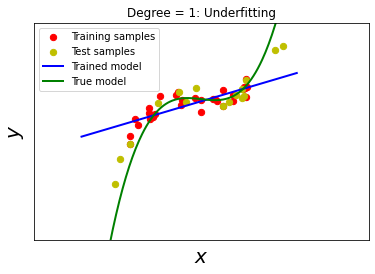

[[-41.90206792  12.66196586]]
(20, 1) (20, 1)


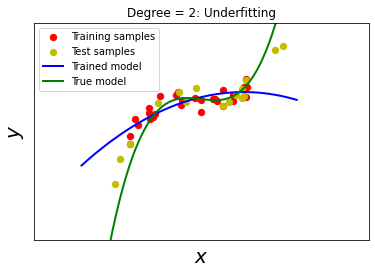

[[-52.79321911  27.33320281  -2.85491906]]
(20, 1) (20, 1)


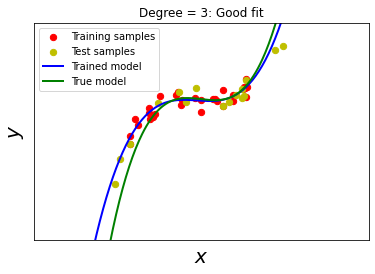

[[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]
(20, 1) (20, 1)


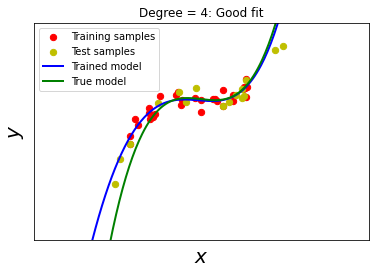

[[-70.11099235  74.66197229 -24.91080481   2.11241837   0.13285956]]
(20, 1) (20, 1)


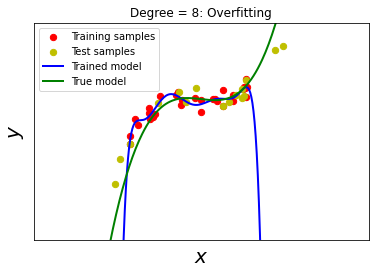

[[-8.31452004e+01  3.47714187e+02 -1.03309551e+03  1.48372383e+03
  -1.08580923e+03  4.36091506e+02 -9.77083149e+01  1.14715264e+01
  -5.50276444e-01]]
(20, 1) (20, 1)


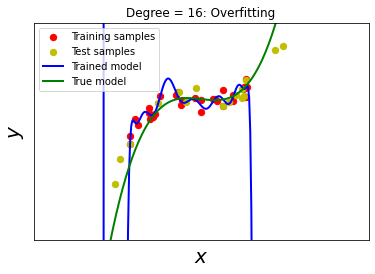

[[-1.13971257e+02  1.48508047e+03 -1.06959529e+04  3.60291758e+04
  -6.18737068e+04  5.04162026e+04 -1.05534162e+03 -3.90923464e+04
   4.21730838e+04 -2.45089845e+04  9.16647447e+03 -2.30845780e+03
   3.91276328e+02 -4.30326740e+01  2.80078928e+00 -8.49956533e-02
   3.07312582e-04]]


In [10]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn import datasets, linear_model

N = 30
N_test = 20 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test,1) - 1/8) *10
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in range(d+1):
        y0 += w[0][i]*x0**i

    # Draw the fitting line 
    plt.scatter(X.T, y.T, c = 'r', s = 40, label = 'Training samples')     # data 
    print(X_test.shape, y_test.shape)
    plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label = 'Test samples')     # data 
    
    plt.plot(x0, y0, 'b', linewidth = 2, label = "Trained model")   # the fitting line
    plt.plot(x0, ytrue, 'g', linewidth = 2, label = "True model")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 3:
        str1 = 'Underfitting'
    elif d > 4:
        str1 = 'Overfitting'
    else:
        str1 = 'Good fit'
    str0 = 'Degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(loc="best")
    
    fn = 'linreg_' + str(d) + '.png'
    
    plt.xlabel('$x$', fontsize = 20);
    plt.ylabel('$y$', fontsize = 20);
    
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()
    print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 16)

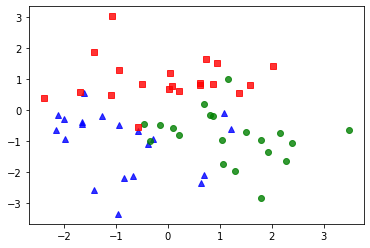

In [11]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(4)

means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T


def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 6, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 6, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 6, alpha = .8)

#     plt.axis('equal')
    plt.plot()
#     plt.show()
    
kmeans_display(X, original_label)
plt.show()
y = original_label.T
X = X.T

iter 0, loss: 1.098675
iter 1000, loss: 0.345588
iter 2000, loss: 0.324392
iter 3000, loss: 0.442391
iter 4000, loss: 0.306727
iter 5000, loss: 0.316579
iter 6000, loss: 0.300782
iter 7000, loss: 0.348352
iter 8000, loss: 0.291680
iter 9000, loss: 0.294407
training accuracy: 93.33 %
(1, 89600)


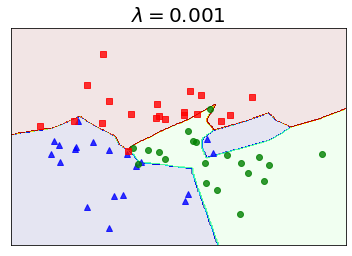

In [13]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# cost or loss function  
lam = 0.001 # regularization parameter 
def cost(Y, Yhat, W1, W2, lam):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1] + \
        lam*(np.linalg.norm(W1)**2 + np.linalg.norm(W2)**2)

d0 = 2
d1 = h = 100 # size of hidden layer 
d2 = C = 3

def mynet(lam):
    # initialize parameters randomely 
    W1 = 0.01*np.random.randn(d0, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))

    # X = X.T # each column of X is a data point 
    Y = convert_labels(y, C)
    N = X.shape[1]
    eta = 1 # learning rate 
    for i in range(10000):
        ## Feedforward 
        Z1 = np.dot(W1.T, X) + b1 
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        # import pdb; pdb.set_trace()  # breakpoint 035ab9b5 //
        Yhat = softmax(Z2)

        # compute the loss: average cross-entropy loss
        

        # print loss after each 1000 iterations
        if i %1000 == 0: 
            loss = cost(Y, Yhat, W1, W2, lam)
            print("iter %d, loss: %f" %(i, loss))

        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T) + lam*W2
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU 
        dW1 = np.dot(X, E1.T) + lam*W1
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # Gradient Descent update 
        # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
        W1 += -eta*dW1 
        b1 += -eta*db1 
        W2 += -eta*dW2
        b2 += -eta*db2 
#     return (W1, W2, b1, b2)




    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    predicted_class = np.argmax(Z2, axis=0)
    acc = (100*np.mean(predicted_class == y))
    print('training accuracy: %.2f %%' % acc)


    xm = np.arange(-3, 4, 0.025)
    xlen = len(xm)
    ym = np.arange(-4, 4, 0.025)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)

    print(np.ones((1, xx.size)).shape)
    xx1 = xx.ravel().reshape(1, xx.size)
    yy1 = yy.ravel().reshape(1, yy.size)

    X0 = np.vstack((xx1, yy1))

    Z1 = np.dot(W1.T, X0) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    # predicted class 
    Z = np.argmax(Z2, axis=0)

    Z = Z.reshape(xx.shape)
    CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

    kmeans_display(X.T, original_label.T)

    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    
    plt.title('$\lambda =$' + str(lam), fontsize = 20)
    fn = 'nnet_reg'+ str(lam) + '.png'
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()


# mynet(0)
# mynet(0.1)
# mynet(0.01)
mynet(0.001)

- Hồi quy Logistic là một kỹ thuật thống kê để phân loại.
- Hồi quy Logistic tương tự như hồi quy tuyến tính, nhưng để dự đoán trường mục tiêu phân loại hoặc rời rạc thay vì trường số.
- Trong hồi quy Logistic thuộc tính có tham số θ càng nhỏ thì mức độ ảnh hưởng so với mục tiêu càng nhỏ và ngược lại.
- Để trả về xác suất, hồi quy Logistic cũng hàm Sigmoid để giới hạn đầu ra từ 0 đến 1.
- Để huấn luyện mô hình hồi quy Logistic, chúng ta có thể sử dụng phương pháp tối ưu hóa Gradient Descent.
- Underfitting, hay độ lệch cao, gây ra bởi một hàm giả thuyết ánh xạ kém theo xu hướng của dữ liệu.
- Overfitting, hoặc phương sai cao, gây ra bởi một hàm giả thuyết khớp với dữ liệu có sẵn nhưng không khái quát tốt để dự đoán dữ liệu mới.
- Để giải quyết Overfitting, chúng ta có thể sử dụng phương pháp giảm số lượng thuộc tính hoặc chính quy hóa.

# Cây quyết định

Cây quyết định là một công cụ hỗ trợ quyết định, sử dụng mô hình dạng cây để trả về kết quả phân loại bao gồm cả khả năng xảy ra kết quả. Cây quyết định là thuật toán chỉ chứa các câu lệnh điều khiển có điều kiện.

Cây quyết định thường được sử dụng trong nghiên cứu hoạt động, cụ thể là trong phân tích quyết định, để giúp xác định chiến lược có khả năng đạt được mục tiêu nhất.

Thuật toán Cây quyết định trong học máy được xây dựng bằng cách chia tập huấn luyện vào các node (lá/nút) riêng biệt thông qua điều kiện, các điều kiện dựa vào các thuộc tính của tập huấn luyện để phân chia, khi phân chia một node sẽ chứa tất cả hoặc hầu hết cùng một lớp. Sau khi xây dựng Cây quyết định, mô hình có thể được sử dụng để dự đoán một trường hợp mới dựa trên đặc điểm của trường hợp đó.

![A](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L06_H01.png?alt=media&token=5a28e638-c73c-478f-ae97-9527d6d7179c)

Để phân chia dữ liệu, Cây quyết định sẽ chọn thuộc tính để phân chia. Do đó việc lựa chọn thuộc tính để phân chia dữ liệu là rất quan trọng. Phải chọn thuộc tính sao cho độ tinh khiết của node sau khi chia là thuần khiết nhất. Một node trong cây được coi là thuần khiết nếu trong 100% các trường hợp, các nút rơi vào một lớp, điều này có nghĩa là bất cứ trường hợp mới nào rơi vào lá này cũng chắc chắn 100% thuộc về lớp này.

Trong thực tế, phương thức sử dụng phân vùng đệ quy để phân chia thành các phân đoạn bằng cách giảm thiểu tạp chất ở mỗi bước. Tạp chất của các node được tính bằng entropy của dữ liệu trong node. 

![A](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L06_H02.png?alt=media&token=0f1583d8-47af-46b3-9d41-67fabc5a10bc)

Trong đó:

- p(A) là tỉ lệ phần trăm trường hợp của lớp A trong node.
- p(B) là tỉ lệ phần trăm trường hợp của lớp B trong node.

Entropy là lượng rối loạn thông tin hoặc lượng ngẫu nhiên trong dữ liệu. Trong các Cây quyết định, chúng ta tìm kiếm những cây có Entropy nhỏ nhất trong các node của chúng. Nếu các trường hợp trong node là hoàn toàn đồng nhất, Entropy bằng 0 và nếu các mẫu được chia đều thì nó có Entropy là 1.

![B](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L06_H03.png?alt=media&token=ce51b2fb-2674-429b-9d69-eff173e41522)

Thông tin đạt được (Information gain) là thông tin có thể làm tăng mức độ chắc chắn sau khi chia tách dữ liệu. Đó là Entropy của một cây trước khi phân tách trừ đi entropy có trọng số sau khi chia bởi một thuộc tính.

Information gain = (Entropy trước khi chia) - (Trọng số Entropy sau khi chia)

Chúng ta có thể nghĩ về việc đạt được thông tin và Entropy là đối nghịch. Khi Entropy giảm, mức tăng thông tin hoặc mức độ chắc chắn sẽ tăng và ngược lại. Vì vậy, khi xây dựng một Cây quyết định, quan trọng nhất là việc tìm kiếm các thuộc tính trả lại mức tăng thông tin cao nhất. Chúng ta nên lặp lại quy trình cho từng nhánh và kiểm tra từng thuộc tính khác để tiếp tục đạt được những chiếc lá tinh khiết nhất. Đây là cách bạn xây dựng một Cây quyết định.

In [5]:
# Xây dựng class TreeNode

from __future__ import print_function 
import numpy as np 
import pandas as pd 


class TreeNode(object):
    def __init__(self, ids = None, children = [], entropy = 0, depth = 0):
        self.ids = ids           # index of data in this node
        self.entropy = entropy   # entropy, will fill later
        self.depth = depth       # distance to root node
        self.split_attribute = None # which attribute is chosen, it non-leaf
        self.children = children # list of its child nodes
        self.order = None       # order of values of split_attribute in children
        self.label = None       # label of node if it is a leaf

    def set_properties(self, split_attribute, order):
        self.split_attribute = split_attribute
        self.order = order

    def set_label(self, label):
        self.label = label

Hàm tính entropy dựa trên tần suất

Trong hàm này, chúng ta phải chú ý bỏ các tần suất bằng 0 đi vì logarit tại đây không xác định.

In [6]:
def entropy(freq):
    # remove prob 0 
    freq_0 = freq[np.array(freq).nonzero()[0]]
    prob_0 = freq_0/float(freq_0.sum())
    return -np.sum(prob_0*np.log(prob_0))

Dữ liệu trong trong ví dụ được được lưu trong file weather.csv. Việc huấn luyện decision tree dựa trên ID3 cho tập dữ liệu này và đầu ra dự đoán cho training set được cho bởi

In [3]:
class DecisionTreeID3(object):
    def __init__(self, max_depth= 10, min_samples_split = 2, min_gain = 1e-4):
        self.root = None
        self.max_depth = max_depth 
        self.min_samples_split = min_samples_split 
        self.Ntrain = 0
        self.min_gain = min_gain
    
    def fit(self, data, target):
        self.Ntrain = data.count()[0]
        self.data = data 
        self.attributes = list(data)
        self.target = target 
        self.labels = target.unique()
        
        ids = range(self.Ntrain)
        self.root = TreeNode(ids = ids, entropy = self._entropy(ids), depth = 0)
        queue = [self.root]
        while queue:
            node = queue.pop()
            if node.depth < self.max_depth or node.entropy < self.min_gain:
                node.children = self._split(node)
                if not node.children: #leaf node
                    self._set_label(node)
                queue += node.children
            else:
                self._set_label(node)
                
    def _entropy(self, ids):
        # calculate entropy of a node with index ids
        if len(ids) == 0: return 0
        ids = [i+1 for i in ids] # panda series index starts from 1
        freq = np.array(self.target[ids].value_counts())
        return entropy(freq)

    def _set_label(self, node):
        # find label for a node if it is a leaf
        # simply chose by major voting 
        target_ids = [i + 1 for i in node.ids]  # target is a series variable
        node.set_label(self.target[target_ids].mode()[0]) # most frequent label
    
    def _split(self, node):
        ids = node.ids 
        best_gain = 0
        best_splits = []
        best_attribute = None
        order = None
        sub_data = self.data.iloc[ids, :]
        for i, att in enumerate(self.attributes):
            values = self.data.iloc[ids, i].unique().tolist()
            if len(values) == 1: continue # entropy = 0
            splits = []
            for val in values: 
                sub_ids = sub_data.index[sub_data[att] == val].tolist()
                splits.append([sub_id-1 for sub_id in sub_ids])
            # don't split if a node has too small number of points
            if min(map(len, splits)) < self.min_samples_split: continue
            # information gain
            HxS= 0
            for split in splits:
                HxS += len(split)*self._entropy(split)/len(ids)
            gain = node.entropy - HxS 
            if gain < self.min_gain: continue # stop if small gain 
            if gain > best_gain:
                best_gain = gain 
                best_splits = splits
                best_attribute = att
                order = values
        node.set_properties(best_attribute, order)
        child_nodes = [TreeNode(ids = split,
                     entropy = self._entropy(split), depth = node.depth + 1) for split in best_splits]
        return child_nodes

    def predict(self, new_data):
        """
        :param new_data: a new dataframe, each row is a datapoint
        :return: predicted labels for each row
        """
        npoints = new_data.count()[0]
        labels = [None]*npoints
        for n in range(npoints):
            x = new_data.iloc[n, :] # one point 
            # start from root and recursively travel if not meet a leaf 
            node = self.root
            while node.children: 
                node = node.children[node.order.index(x[node.split_attribute])]
            labels[n] = node.label
            
        return labels

if __name__ == "__main__":
    df = pd.read_csv(r'C:\Users\Quan Thi Thanh Hoa\AppData\Funix\asm2.ipynb\DSP303\machine learning\weather.csv', index_col = 0, parse_dates = True)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    tree = DecisionTreeID3(max_depth = 3, min_samples_split = 2)
    tree.fit(X, y)
    print(tree.predict(X))

['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']


Bài học về Cây quyết định giúp chúng ta nắm được các nội dung như:

- Cây quyết định là một công cụ hỗ trợ quyết định.
- Cây quyết định sử dụng mô hình dạng cây để trả về kết quả phân loại bao gồm cả khả năng xảy ra kết quả.
- Cây quyết định được xây dựng bằng cách chia tập huấn luyện vào các node riêng biệt thông qua điều kiện.
- Việc lựa chọn thuộc tính để phân chia dữ liệu Cây quyết định cho là rất quan trọng.
- Độ thuần khiến của mỗi node trong Cây quyết định được tính bằng công thức Entropy.
- Entropy càng nhỏ thì độ thuần khiết càng tốt.
- Thông tin đạt được (Information gain) là thông tin có thể làm tăng mức độ chắc chắn sau khi chia tách dữ liệu.
- Information gain được tính bằng Entropy trước khi chia trừ Entropy sau khi chia nhân trọng số.
- Cây quyết định tốt nhất là cây có Entropy nhỏ nhất ở từng node và lớn nhất ở Information gain.

# Bài 7 - Suport Vector Machine và Ensemble Learning 

Trong bài học này, bạn sẽ tìm hiểu về phân loại với một thuật toán vô cùng mạnh mẽ: Support Vector Machine. Sau đó bạn sẽ tìm hiểu về kỹ thuật kết hợp các mô hình học máy để khiến chất lượng dự đoán trở nên mạnh mẽ và chính xác hơn. Cuối cùng bạn sẽ được thực hành với Support Vector Machine thông qua bài Lab.

Support Vector Machine là một thuật toán có giám sát. Hoạt động bằng cách ánh xạ dữ liệu vào không gian đặc trưng có chiều lớn để có thể phân loại các điểm dữ liệu, ngay cả khi dữ liệu không được phân tách tuyến tính. Sau đó, một phân tách được ước tính cho dữ liệu.

![A](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L07_H01.png?alt=media&token=35421b05-777d-43d7-81dd-fcf8235906ac)

Ánh xạ dữ liệu vào một không gian có chiều cao hơn được gọi là kernelling. Hàm toán học được sử dụng cho phép biến đổi được gọi là hàm kernel và có thể có các loại khác nhau như tuyến tính, đa thức, RBF và sigmoid.

SVM dựa trên ý tưởng tìm siêu phẳng chia một tập dữ liệu một cách tốt nhất thành hai lớp. Một lựa chọn hợp lý cho siêu phẳng tốt nhất là lựa chọn thể hiện sự phân tách hoặc bản lề giữa hai lớp lớn nhất.

![B](https://firebasestorage.googleapis.com/v0/b/funix-way.appspot.com/o/xSeries%2FData%20Science%20%2FDSP303x_1.2_VN%2FContent_Image%2FDSP303x_1.2_L07_H02.png?alt=media&token=3079e13f-abeb-4bd9-9f99-2164a41a3ba2)

Các biên độ này phụ thuộc vào vectơ hỗ trợ có ý nghĩa để đạt được mục tiêu. Do đó mục tiêu cuối cùng của SVM là cố gắng tìm siêu phẳng theo cách mà nó có khoảng cách tối đa tới các vector hỗ trợ.

SVM cũng có thể được huấn luyện bằng phương pháp tối ưu hóa Gradient Descent để tìm ra tham số w và b để thiết lập được siêu mặt phẳng phân tách dữ liệu. 

Hai ưu điểm chính của SVM:

- Chính xác trong không gian chiều cao.
- Chỉ sử dụng tập hợp con của các điểm huấn luyện trong hàm quyết định được gọi là, các support vector, vì vậy nó cũng hiệu quả cho bộ nhớ.

Nhược điểm của SVM:

- Thuật toán dễ bị over-fitting nếu số lượng thuộc tính lớn hơn nhiều so với số lượng mẫu.
- Không trực tiếp cung cấp ước tính xác suất, đó là mong muốn trong hầu hết các bài toán phân loại .
- Không quá hiệu quả trong tính toán nếu tập dữ liệu của bạn rất lớn, chẳng hạn như khi bạn có hơn 1.000 hàng.

## Tình huống nào nên sử dụng SVM?

- Nhiệm vụ phân tích hình ảnh, chẳng hạn phân loại hình ảnh và nhận dạng chữ số tay. 
- Hiệu quả trong nhiệm vụ khai thác văn bản, đặc biệt do tính hiệu quả của nó trong việc xử lý dữ liệu chiều cao. 
- ví dụ: được sử dụng trong phát hiện thư rác, phân loại văn bản và phân tích tình cảm. 
- Một ứng dụng khác của SVM là phân loại dữ liệu biểu đồ gen, một lần nữa, vì sức mạnh của nó trong phân loại dữ liệu chiều cao.    
- SVM cũng có thể được sử dụng cho các loại bài toán học máy khác, chẳng hạn như hồi quy, phát hiện ngoại lệ và phân cụm. 

In [1]:
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 
X = np.concatenate((X0.T, X1.T), axis = 1) # all data 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels

In [4]:
print("means:", means)
print("cov:", cov)

means: [[2, 2], [4, 2]]
cov: [[0.3, 0.2], [0.2, 0.3]]


In [3]:
print("X0:", X0)
print("X1:", X1)
print("X:", X)
print("y:", y)

X0: [[2.37319011 1.71875981]
 [1.51261889 1.40558943]
 [2.4696794  2.02144973]
 [1.78736889 1.29380961]
 [1.81231157 1.56119497]
 [2.03717355 1.93397133]
 [1.53790057 1.87434722]
 [2.29312867 2.76537389]
 [1.38805594 1.86419379]
 [1.57279694 0.90707347]]
X1: [[3.42746579 0.71254431]
 [4.24760864 2.39846497]
 [3.33595491 1.61731637]
 [3.69420104 1.94273986]
 [4.53897645 2.54957308]
 [3.3071994  0.19362396]
 [4.13924705 2.09561534]
 [4.47383468 2.41269466]
 [4.00512009 1.89290099]
 [4.28205624 1.79675607]]
X: [[2.37319011 1.51261889 2.4696794  1.78736889 1.81231157 2.03717355
  1.53790057 2.29312867 1.38805594 1.57279694 3.42746579 4.24760864
  3.33595491 3.69420104 4.53897645 3.3071994  4.13924705 4.47383468
  4.00512009 4.28205624]
 [1.71875981 1.40558943 2.02144973 1.29380961 1.56119497 1.93397133
  1.87434722 2.76537389 1.86419379 0.90707347 0.71254431 2.39846497
  1.61731637 1.94273986 2.54957308 0.19362396 2.09561534 2.41269466
  1.89290099 1.79675607]]
y: [[ 1.  1.  1.  1.  1.  1.

In [2]:
from cvxopt import matrix, solvers
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V)) # see definition of V, K near eq (8)

p = matrix(-np.ones((2*N, 1))) # all-one vector 
# build A, b, G, h 
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = ')
print(l.T)

lambda = 
[[8.54018321e-01 2.89132533e-10 1.37095535e+00 6.36030818e-10
  4.04317408e-10 8.82390106e-10 6.35001881e-10 5.49567576e-10
  8.33359230e-10 1.20982928e-10 6.86678649e-10 1.25039745e-10
  2.22497367e+00 4.05417905e-09 1.26763684e-10 1.99008949e-10
  2.13742578e-10 1.51537487e-10 3.75329509e-10 3.56161975e-10]]


In [9]:
print("h:", h)

h: [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [10]:
print("V:", V)
print("K:", K)

V: [[ 2.37319011  1.51261889  2.4696794   1.78736889  1.81231157  2.03717355
   1.53790057  2.29312867  1.38805594  1.57279694 -3.42746579 -4.24760864
  -3.33595491 -3.69420104 -4.53897645 -3.3071994  -4.13924705 -4.47383468
  -4.00512009 -4.28205624]
 [ 1.71875981  1.40558943  2.02144973  1.29380961  1.56119497  1.93397133
   1.87434722  2.76537389  1.86419379  0.90707347 -0.71254431 -2.39846497
  -1.61731637 -1.94273986 -2.54957308 -0.19362396 -2.09561534 -2.41269466
  -1.89290099 -1.79675607]]
K: [ 8.59e+00  6.01e+00  9.34e+00  6.47e+00  6.98e+00  8.16e+00  6.87e+00 ... ]
[ 6.01e+00  4.26e+00  6.58e+00  4.52e+00  4.94e+00  5.80e+00  4.96e+00 ... ]
[ 9.34e+00  6.58e+00  1.02e+01  7.03e+00  7.63e+00  8.94e+00  7.59e+00 ... ]
[ 6.47e+00  4.52e+00  7.03e+00  4.87e+00  5.26e+00  6.14e+00  5.17e+00 ... ]
[ 6.98e+00  4.94e+00  7.63e+00  5.26e+00  5.72e+00  6.71e+00  5.71e+00 ... ]
[ 8.16e+00  5.80e+00  8.94e+00  6.14e+00  6.71e+00  7.89e+00  6.76e+00 ... ]
[ 6.87e+00  4.96e+00  7.59e+00  5

In [11]:
print("p:", p)
print("G:", G)

p: [-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]

G: [-1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 ... ]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 ... ]
[-0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 ... ]
[-0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 ... ]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 ... ]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 ... ]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 ... ]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 ... ]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 ... ]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00

Đây chính là các giá trị bằng 0 nhưng vì sai số tính toán nên nó khác 0 một chút. Chỉ có 3 giá trị khác 0, ta dự đoán là sẽ có 3 điểm là support vectors.

1. Phân loại là học có giám sát

- Chia loại hoặc phân loại một số mục chưa biết thành một tập hợp các lớp riêng biệt.
- Tìm hiểu mối quan hệ giữa một tập hợp các biến đặc tính và biến mục tiêu quan tâm.

2. Các thuật toán khác nhau trong Phân loại

- k-Nearest Neighbors
- Hồi quy Logistic
- Cây quyết định
- Support Vector Machine

3. Evaluation Metrics trong Phân loại

- Jaccard index
- F1-score: Precision, Recall
- Log Loss: Xác suất của một nhãn lớp

4. Vấn đề của Overfitting

- Định nghĩa Overfitting/Underfitting
- Cách giảm overfitting: giảm số lượng đặc tính, chính quy hóa

5. Các phương pháp kết hợp

- Bagging (đóng gói)
- Boosting (tăng cường)
- Stacking (xếp chồng)